In [1]:
import numpy as np
import pandas as pd

#!pip install xgboost
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#!pip install shap
import matplotlib.pyplot as plt

In [2]:
fTest = pd.read_csv('Resources/test.csv')

fTest=fTest.sample(50000)

In [3]:
dfTrain=pd.read_csv('Resources/train.csv')
dfTrain=dfTrain.sample(50000)


In [4]:
var_columns=[c for c in dfTrain.columns if c not in ['ID_code', 'target']]
X = dfTrain.loc[:, var_columns]
y=dfTrain.loc[:, 'target']
X_train, X_valid, y_train, y_valid = train_test_split (X,y, test_size=.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((40000, 200), (10000, 200), (40000,), (10000,))

In [5]:
model_xgboost = xgb.XGBClassifier(learning_rate=.01,
                                     max_depth=5,
                                     n_estimators=3000,
                                     subsample=.5,
                                     colsample_bytree=.5,
                                     eval_metric='auc',
                                     verbosity=1,
                                    random_state=1)

eval_set =[(X_valid, y_valid)]

model_xgboost.fit(X_train,
                 y_train,
                 early_stopping_rounds=10,
                 eval_set=eval_set,
                 verbose=True)

C:\Users\MW\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.60081
[1]	validation_0-auc:0.65023
[2]	validation_0-auc:0.66076
[3]	validation_0-auc:0.67044
[4]	validation_0-auc:0.68085
[5]	validation_0-auc:0.68940
[6]	validation_0-auc:0.69581
[7]	validation_0-auc:0.69621
[8]	validation_0-auc:0.69992
[9]	validation_0-auc:0.70620
[10]	validation_0-auc:0.70752
[11]	validation_0-auc:0.71134
[12]	validation_0-auc:0.71578
[13]	validation_0-auc:0.71781
[14]	validation_0-auc:0.72025
[15]	validation_0-auc:0.72152
[16]	validation_0-auc:0.72140
[17]	validation_0-auc:0.72359
[18]	validation_0-auc:0.72512
[19]	validation_0-auc:0.72936
[20]	validation_0-auc:0.73008
[21]	validation_0-auc:0.73192
[22]	validation_0-auc:0.73482
[23]	validation_0-auc:0.73406
[24]	validation_0-auc:0.73745
[25]	validation_0-auc:0.73818
[26]	validation_0-auc:0.74145
[27]	validation_0-auc:0.74112
[28]	validation_0-auc:0.74313
[29]	validation_0-auc:0.74369
[30]	validation_0-auc:0.74441
[31]	validation_0-auc:0.74331
[32]	validation_0-auc:0.74351
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=1)

In [6]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid {:.4f}".format(roc_auc_score(y_train, y_train_pred), roc_auc_score(y_valid,y_valid_pred)))

AUC Train: 0.8635
AUC Valid 0.7880


In [7]:
model_xgboost_final = xgb.XGBClassifier(learning_rate=0.05,
                                          max_depth=2,
                                          n_estimators=5000,
                                          num_parallel_tree=5,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_final.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.65253	validation_1-auc:0.63392
[1]	validation_0-auc:0.69377	validation_1-auc:0.67524
[2]	validation_0-auc:0.71374	validation_1-auc:0.69896
[3]	validation_0-auc:0.71766	validation_1-auc:0.70096
[4]	validation_0-auc:0.72891	validation_1-auc:0.71030
[5]	validation_0-auc:0.73845	validation_1-auc:0.71370
[6]	validation_0-auc:0.74383	validation_1-auc:0.72182
[7]	validation_0-auc:0.74576	validation_1-auc:0.72314
[8]	validation_0-auc:0.74866	validation_1-auc:0.72681
[9]	validation_0-auc:0.75268	validation_1-auc:0.72868
[10]	validation_0-auc:0.75404	validation_1-auc:0.73106
[11]	validation_0-auc:0.75541	validation_1-auc:0.73086
[12]	validation_0-auc:0.75542	validation_1-auc:0.73157
[13]	validation_0-auc:0.75760	validation_1-auc:0.73416
[14]	validation_0-auc:0.75672	validation_1-auc:0.73339
[15]	validation_0-auc:0.75553	validation_1-auc:0.73291
[16]	validation_0-auc:0.76067	validation_1-auc:0.73704
[17]	validation_0-auc:0.76070	validation_1-auc:0.73721
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=4, num_parallel_tree=5,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=1)

In [8]:
y_train_pred = model_xgboost_final.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_final.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9519
AUC Valid: 0.8939


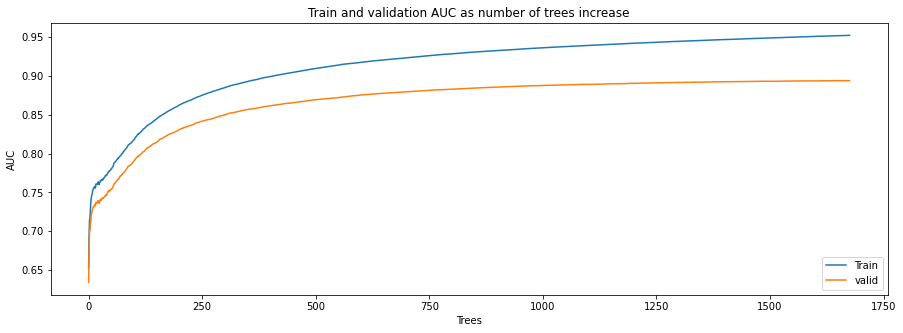

In [10]:
evaluation_results = model_xgboost_final.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [13]:
Variable_Importance2 = pd.DataFrame({"Variable": var_columns,
                           "Importance": model_xgboost_final.feature_importances_}) \
                        .sort_values(by='Importance', ascending=False)
Variable_Importance2[:10]

,Variable,Importance
81,var_81,0.011537
139,var_139,0.010970
26,var_26,0.010208
12,var_12,0.009765
146,var_146,0.009453
53,var_53,0.009408
110,var_110,0.009178
6,var_6,0.009111
109,var_109,0.008956
2,var_2,0.008687


In [14]:
Variable_Importance2.to_csv('output/VarImpModel2.csv')

<AxesSubplot:>

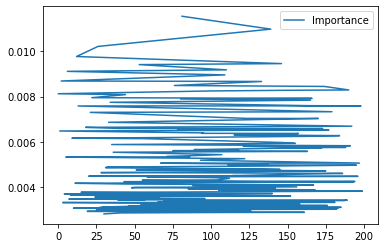

In [17]:
Variable_Importance2.plot()